In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml

data = fetch_openml('mnist_784',as_frame=True)
data

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [3]:
from sklearn.model_selection import train_test_split

X = data['data']
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000,), (14000,))

In [4]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
y.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [7]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

log_cls = LogisticRegression(C=0.001,max_iter=1000,random_state=42,class_weight='balanced')
log_cls.fit(X_train_scaled,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [95]:
from sklearn.model_selection import cross_val_score,cross_val_predict

val_score = cross_val_score(log_cls,X_train_scaled,y_train,cv=3,scoring='accuracy')

print(f'Train Accuracy: {log_cls.score(X_train_scaled,y_train)}')
print(f'Valid Accuracy: {np.mean(val_score)}')

Train Accuracy: 0.9430714285714286
Valid Accuracy: 0.9179464425499604


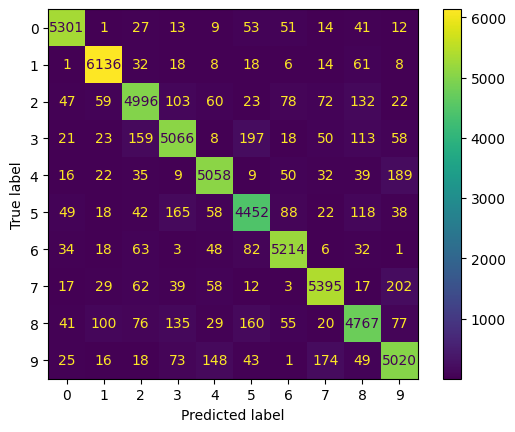

In [96]:
from sklearn.metrics import ConfusionMatrixDisplay

y_valid_pred = cross_val_predict(log_cls,X_train_scaled,y_train,cv=3,method='predict')

ConfusionMatrixDisplay.from_predictions(y_train,y_valid_pred)

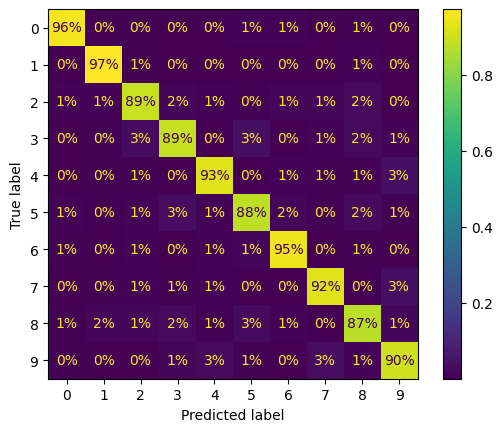

In [97]:
ConfusionMatrixDisplay.from_predictions(y_train, y_valid_pred, normalize='true', values_format=".0%")

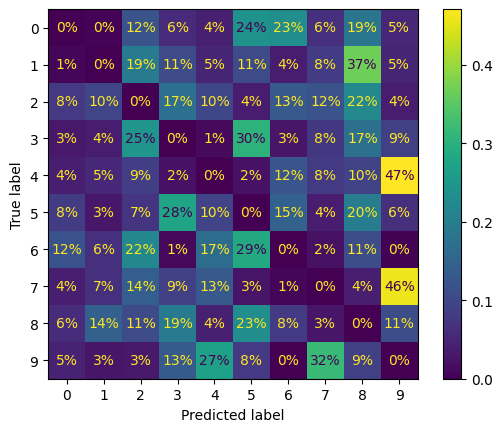

In [98]:
sample_weight = (y_train != y_valid_pred)
ConfusionMatrixDisplay.from_predictions(y_train, y_valid_pred, sample_weight=sample_weight, normalize='true', values_format=".0%")

In [8]:
from sklearn.svm import SVC
svc = SVC(C=1,kernel='poly',degree=4,coef0=1,class_weight='balanced',random_state=42)
svc.fit(X_train_scaled,y_train)

SVC(C=1, class_weight='balanced', coef0=1, degree=4, kernel='poly',
    random_state=42)

In [9]:
from sklearn.model_selection import cross_val_score,cross_val_predict

val_score = cross_val_score(svc,X_train_scaled,y_train,cv=3,scoring='accuracy',n_jobs=-1)

print(f'Train Accuracy: {svc.score(X_train_scaled,y_train)}')
print(f'Valid Accuracy: {np.mean(val_score)}')

Train Accuracy: 0.9985178571428571
Valid Accuracy: 0.9738571571902158


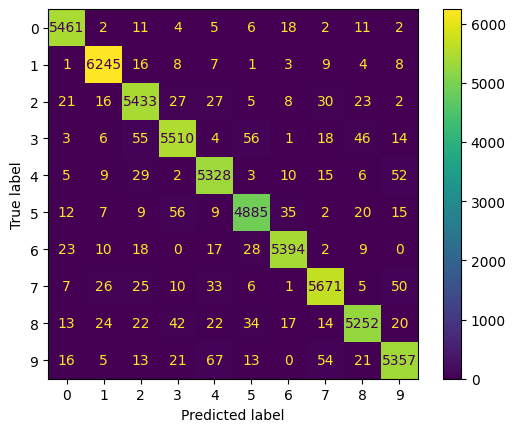

In [107]:
from sklearn.metrics import ConfusionMatrixDisplay

y_valid_pred_svc = cross_val_predict(svc,X_train_scaled,y_train,cv=3,method='predict')

ConfusionMatrixDisplay.from_predictions(y_train,y_valid_pred_svc)

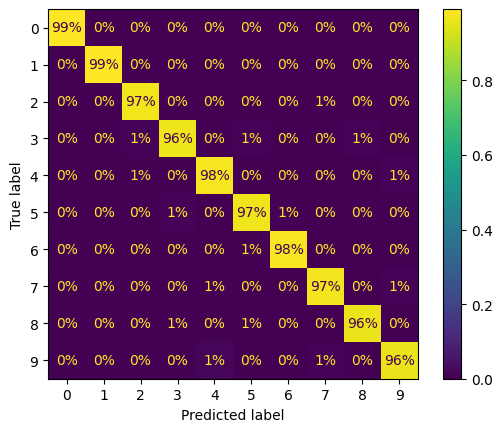

In [108]:
ConfusionMatrixDisplay.from_predictions(y_train, y_valid_pred_svc, normalize='true', values_format=".0%")

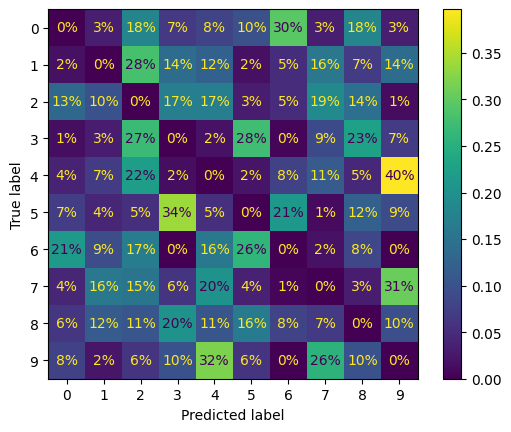

In [109]:
sample_weight = (y_train != y_valid_pred_svc)
ConfusionMatrixDisplay.from_predictions(y_train, y_valid_pred_svc, sample_weight=sample_weight, normalize='true', values_format=".0%")

In [110]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=9,class_weight='balanced',random_state=42)
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=42)

In [111]:
from sklearn.model_selection import cross_val_score,cross_val_predict

val_score = cross_val_score(dt,X_train_scaled,y_train,cv=3,scoring='accuracy',n_jobs=-1)

print(f'Train Accuracy: {dt.score(X_train_scaled,y_train)}')
print(f'Valid Accuracy: {np.mean(val_score)}')

Train Accuracy: 0.8809821428571428
Valid Accuracy: 0.8443750506031836


In [112]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000,max_samples=5000,random_state=42,class_weight='balanced')
rf.fit(X_train_scaled,y_train)

RandomForestClassifier(class_weight='balanced', max_samples=5000,
                       n_estimators=1000, random_state=42)

In [113]:
from sklearn.model_selection import cross_val_score,cross_val_predict

val_score = cross_val_score(rf,X_train_scaled,y_train,cv=3,scoring='accuracy',n_jobs=-1)

print(f'Train Accuracy: {rf.score(X_train_scaled,y_train)}')
print(f'Valid Accuracy: {np.mean(val_score)}')

Train Accuracy: 0.9725892857142857
Valid Accuracy: 0.9508929007985429


In [114]:
# test performance 
print(f'Test Accuracy: {svc.score(X_test_scaled,y_test)}')

Test Accuracy: 0.9774285714285714


In [ ]:
from sklearn.pipeline import Pipeline

svc_pipe = Pipeline(steps=[
    ('scale',scaler),
    ('model',svc)
])

svc_pipe.fit(X,y)

val_score = cross_val_score(svc_pipe,X,y,cv=3,scoring='accuracy',n_jobs=-1)

In [11]:
print(f'Train Accuracy: {svc_pipe.score(X,y)}')
print(f'Valid Accuracy: {np.mean(val_score)}')

Train Accuracy: 0.9984285714285714
Valid Accuracy: 0.9744000016221809


In [12]:
import joblib

joblib.dump(svc_pipe,'hand_writen_detector_log_cls.pkl')

['hand_writen_detector_log_cls.pkl']